# T.U.I.A 2024 - Aprendizaje Automático II 

## TP 1 - Redes Densas y Convolucionales

### Integrantes:
* Ponce, Daniel 
* Yañez, Mirian


### Problema 1

Descripción:
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

Dataset:
https://drive.google.com/file/d/1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc/view?usp=drive_link

El dataset proporcionado incluye las siguientes variables para cada estudiante:

* Hours Studied: El número total de horas dedicadas al estudio por cada estudiante.
* Previous Scores: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
* Extracurricular Activities: Si el estudiante participa en actividades extracurriculares (Sí o No).
* Sleep Hours: El número promedio de horas de sueño que el estudiante tuvo por día.
* Sample Question Papers Practiced: El número de cuestionarios de muestra que el estudiante practicó.
Además, el dataset incluye la variable objetivo:
* Performance Index: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

Objetivo:
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.

Entrega:

La entrega debe incluir:
Código fuente de la solución implementada en Google Colab, que incluya:
* Análisis previo y preprocesamiento del set de datos.
* Definición y entrenamiento del modelo.
* Resultados de la evaluación del modelo, incluyendo métricas de desempeño y visualizaciones relevantes.

Nota: el código debe estar debidamente documentado con comentarios explicativos para que el trabajo sea fácilmente comprensible para otros revisores.


### Instalamos las dependencias

In [20]:
!pip install gdown
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Importamos las librerías

In [21]:
import gdown
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import zipfile
import matplotlib.pyplot as plt

### Creamos las clases para:
* Descargar y cargar el dataset: Gestión de la descarga desde Google Drive y carga en un DataFrame de Pandas.
* Realizar el preprocesamiento de datos: Incluye codificación de variables categóricas, escalado de características y división en entrenamiento y prueba.
* Construir el modelo de regresión: Implementación del modelo usando TensorFlow/Keras, definiendo la arquitectura y compilando el modelo.
* Entrenar el modelo: Proceso de entrenamiento con los datos, guardando el historial para su análisis.
* Graficar las métricas: Visualización de la pérdida (Loss) y el error absoluto medio (MAE) para comparar entrenamiento y validación.
* Evaluar el modelo: Cálculo de métricas como MSE, MAE y R² sobre los conjuntos de entrenamiento y prueba.

In [22]:
class RegressionModel:
    def __init__(self):
        self.dataset = None
        self.model = None
    
    def download_dataset(self, file_id, output_name="dataset.zip"):
        """Descarga el dataset desde Google Drive."""
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, output_name, quiet=False)
        print(f"Descargado: {output_name}")

    def extract_zip(self, zip_path="dataset.zip", extract_to="."):
        """Extrae el contenido del archivo ZIP."""
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Contenido extraído en: {extract_to}")

    def load_dataset(self, path="student_performance.csv"):
        """Carga el dataset en un DataFrame."""
        self.dataset = pd.read_csv(path, encoding='utf-8')
        print(self.dataset.head())
        return self.dataset

    def preprocess_data(self):
        """Preprocesa los datos para el entrenamiento."""
        data = self.dataset.copy()

        # Codificación de actividades extracurriculares (Sí/No)
        label_encoder = LabelEncoder()
        data['Extracurricular Activities'] = label_encoder.fit_transform(
            data['Extracurricular Activities']
        )

        # Separación de características y variable objetivo
        X = data.drop('Performance Index', axis=1)
        y = data['Performance Index']

        # Escalado de las características
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        return train_test_split(X, y, test_size=0.2, random_state=42)

    def build_model(self, input_dim):
        """Construye el modelo usando Input() en lugar de input_shape."""
        self.model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(input_dim,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)  # Capa de salida
        ])
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def train_model(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """Entrena el modelo y devuelve el historial."""
        history = self.model.fit(
            X_train, y_train, validation_data=(X_val, y_val),
            epochs=epochs, batch_size=batch_size, verbose=1
        )
        self.plot_training_history(history)
        return history

    def plot_training_history(self, history):
        """Grafica las métricas de entrenamiento y validación."""
        plt.figure(figsize=(12, 5))

        # Pérdida (Loss)
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training vs Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # MAE (Error Absoluto Medio)
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Training vs Validation MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

        plt.show()

    def evaluate_model(self, X_train, y_train, X_test, y_test):
        """Evalúa el modelo en entrenamiento y test."""
        # Evaluación en entrenamiento
        y_train_pred = self.model.predict(X_train).flatten()
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        print(f"Entrenamiento - MSE: {train_mse}, MAE: {train_mae}, R²: {train_r2}")

        # Evaluación en test
        y_test_pred = self.model.predict(X_test).flatten()
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        print(f"Test - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")


In [23]:
file_id = "1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc"
model = RegressionModel()
model.download_dataset(file_id)
model.extract_zip()

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /Users/miri/AAII-2/dataset.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 1.20MB/s]

Descargado: dataset.zip
Contenido extraído en: .


### Realizamos un análisis previo del dataset

In [24]:
data = pd.read_csv("student_performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [25]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [26]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [27]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

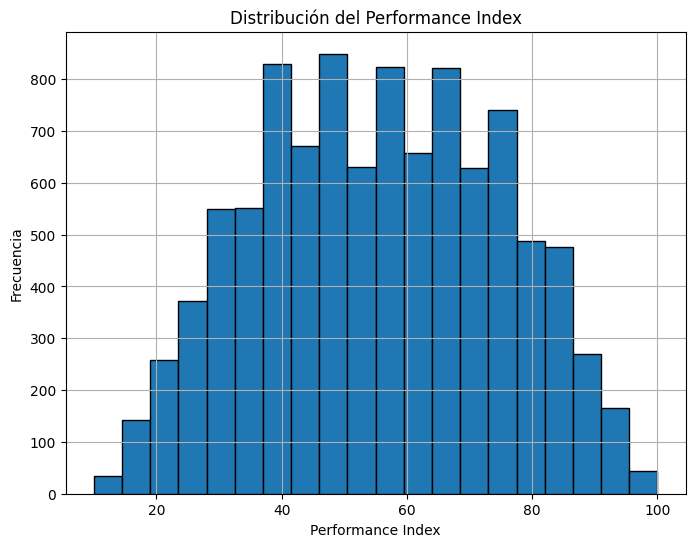

In [28]:
plt.figure(figsize=(8, 6))
data['Performance Index'].hist(bins=20, edgecolor='black')
plt.title('Distribución del Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frecuencia')
plt.show()

Matriz de correlación


Matriz de correlación:
                                   Hours Studied  Previous Scores  Sleep Hours  \
Hours Studied                          1.000000        -0.012390     0.001245   
Previous Scores                       -0.012390         1.000000     0.005944   
Sleep Hours                            0.001245         0.005944     1.000000   
Sample Question Papers Practiced       0.017463         0.007888     0.003990   
Performance Index                      0.373730         0.915189     0.048106   
Extracurricular Activities_Yes         0.003873         0.008369    -0.023284   

                                  Sample Question Papers Practiced  \
Hours Studied                                             0.017463   
Previous Scores                                           0.007888   
Sleep Hours                                               0.003990   
Sample Question Papers Practiced                          1.000000   
Performance Index                                        

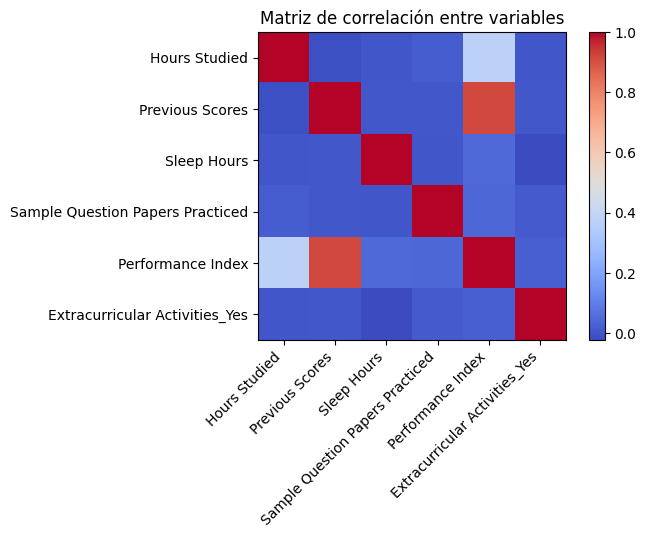

In [29]:
# Convertir 'Extracurricular Activities' a variable dummy
data_dummy = pd.get_dummies(data, columns=['Extracurricular Activities'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = data_dummy.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:\n", correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Matriz de correlación entre variables')
plt.xticks(range(data_dummy.shape[1]), data_dummy.columns, rotation=45, ha='right')
plt.yticks(range(data_dummy.shape[1]), data_dummy.columns)
plt.show()


### Llamamos a los métodos que se encuentran arriba:

* Carga del dataset
* Preprocesamiento de datos
* Construcción del modelo de regresión
* Entrenamiento del modelo 
* Evaluación del modelo

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2472.3142 - mae: 44.1127 - val_loss: 47.5090 - val_mae: 5.4468
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.4322 - ma

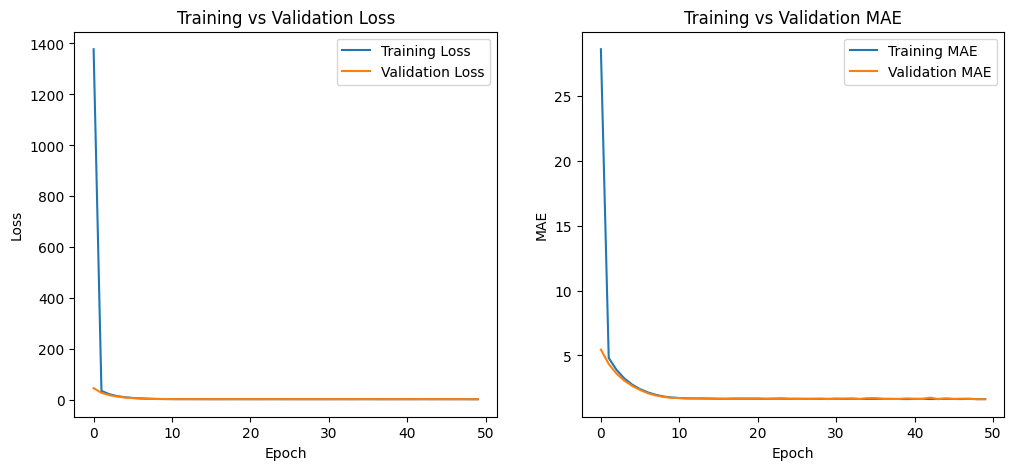

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Entrenamiento - MSE: 4.102725936538907, MAE: 1.602205209493637, R²: 0.9888716388359643
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test - MSE: 4.188138535312416, MAE: 1.6242835292816162, R²: 0.9886985786679235


In [30]:
data = model.load_dataset("student_performance.csv")
X_train, X_test, y_train, y_test = model.preprocess_data()
model.build_model(input_dim=X_train.shape[1])
history = model.train_model(X_train, y_train, X_test, y_test)
model.evaluate_model(X_train, y_train, X_test, y_test)

### Conclusión:

#### Gráficas de Pérdida (Loss) y MAE:

Las gráficas muestran una disminución rápida y consistente de la pérdida y el error absoluto medio (MAE) tanto en el conjunto de entrenamiento como en el de validación.
Esto indica que el modelo aprende rápidamente durante las primeras épocas y alcanza un punto de convergencia estable hacia el final del entrenamiento, con una pequeña diferencia entre entrenamiento y validación.

#### Métricas de Evaluación (MSE, MAE, R²):

Entrenamiento:
MSE: 4.10
MAE: 1.60
R²: 0.9888

Prueba:
MSE: 4.18
MAE: 1.62
R²: 0.9887

El valor bajo de MSE (Error Cuadrático Medio) indica que las predicciones del modelo están cerca de los valores reales.

El MAE (Error Absoluto Medio) es consistente en los conjuntos de entrenamiento y prueba, lo que sugiere que el modelo no está sobreajustado.

El R² cercano a 0.99 muestra que el modelo tiene un muy buen ajuste a los datos, explicando la mayoría de la variación de la variable objetivo.


El modelo entrenado tiene un buen desempeño tanto en los datos de entrenamiento como en los de prueba, lo que indica que generaliza bien. No parece haber sobreajuste significativo, dado que las métricas de validación y prueba son similares a las de entrenamiento.

Podríamos decir que el modelo de regresión es confiable y preciso para predecir el rendimiento de estudiantes.